# INFSCI Final Project - Haiden Hunter and Ryan Armendariz-Lopez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv("hot-100-current.csv")
data.head()

chart_week  current_week                              title     performer  \
0  2022-01-01             1    All I Want For Christmas Is You  Mariah Carey   
1  2022-01-01             2  Rockin' Around The Christmas Tree    Brenda Lee   
2  2022-01-01             3                   Jingle Bell Rock   Bobby Helms   
3  2022-01-01             4            A Holly Jolly Christmas     Burl Ives   
4  2022-01-01             5                         Easy On Me         Adele   

   last_week  peak_pos  wks_on_chart  
0        1.0         1            50  
1        2.0         2            44  
2        4.0         3            41  
3        5.0         4            25  
4        3.0         1            11

# Cleaning and Organizing Data #

The data set was organized in such a way that made analysis difficult. Each week's Billboard Top 100 was placed consecutively, from 202X-1958. This meant that analyzing chart performance would require us to iterate through the list to find each instance of a song, then organize those results into it's own dataset.

To fix this, we decided to pivot our data. The pivot resulted in the following structure for the dataset:

| Song Title | Artist | Week 1 of 1958 | Week 2 of 1958 | ... | Week 51 of 202X | Week 52 of 202X |
| --- | --- | --- | --- | --- | --- | --- |

This resulted in alot of `Nan` values, but we ultimately decided that these were MNAR values, as they tell us that a song was not in the charts on that week.

In [3]:
data["chart_week"] = pd.to_datetime(data["chart_week"])

# pivot table to better organize data
pivot = data.pivot_table(
    index=['title', 'performer'],
    columns='chart_week',
    values='current_week'
)

pivot.head()

chart_week                                                                     1958-08-04  \
title                                 performer                                             
"B" Girls                             Young And Restless                              NaN   
"Cherry Cherry" from Hot August Night Neil Diamond                                    NaN   
"Having A Party" Medley               The Ovations (Featuring Louis Williams)         NaN   
"Joy" Pt. I                           Isaac Hayes                                     NaN   
"Roots" Medley                        Quincy Jones                                    NaN   

chart_week                                                                     1958-08-11  \
title                                 performer                                             
"B" Girls                             Young And Restless                              NaN   
"Cherry Cherry" from Hot August Night Neil Diamond                                    NaN   
"Having A Party" Medley               The Ovations (Featuring Louis Williams)         NaN   
"Joy" Pt. I                           Isaac Hayes                                     NaN   
"Roots" Medley                        Quincy Jones                                    NaN   

chart_week                                                                     1958-08-18  \
title                                 performer                                             
"B" Girls                             Young And Restless                              NaN   
"Cherry Cherry" from Hot August Night Neil Diamond                                    NaN   
"Having A Party" Medley               The Ovations (Featuring Louis Williams)         NaN   
"Joy" Pt. I                           Isaac Hayes                                     NaN   
"Roots" Medley                        Quincy Jones                                    NaN   

chart_week                                                                     1958-08-25  \
title                                 performer                                             
"B" Girls                             Young And Restless                              NaN   
"Cherry Cherry" from Hot August Night Neil Diamond                                    NaN   
"Having A Party" Medley               The Ovations (Featuring Louis Williams)         NaN   
"Joy" Pt. I                           Isaac Hayes                                     NaN   
"Roots" Medley                        Quincy Jones                                    NaN   

chart_week                                                                     1958-09-01  \
title                                 performer                                             
"B" Girls                             Young And Restless                              NaN   
"Cherry Cherry" from Hot August Night Neil Diamond                                    NaN   
"Having A Party" Medley               The Ovations (Featuring Louis Williams)         NaN   
"Joy" Pt. I                           Isaac Hayes                                     NaN   
"Roots" Medley                        Quincy Jones                                    NaN   

chart_week                                                                     1958-09-08  \
title                                 performer                                             
"B" Girls                             Young And Restless                              NaN   
"Cherry Cherry" from Hot August Night Neil Diamond                                    NaN   
"Having A Party" Medley               The Ovations (Featuring Louis Williams)         NaN   
"Joy" Pt. I                           Isaac Hayes                                     NaN   
"Roots" Medley                        Quincy Jones                                    NaN   

chart_week                                                                     1958-09-1

# Billboard Streak Statistics #

- **Average Streak:** around 12 weeks
- **Longest Streak:** Glass Animals - "Heat Wave" at 92 weeks

# On Outliers #

The dataset is highly Right-Skewed. While the maximum streak sits at 92 weeks, 75% of the data is below 17. However, this desparity is ultimately useful because it can help with analyzing a song's longevity. Billboard charts are prone to what are referred to as **"One Hit Wonders"**—artists who get on the charts only once, and whoses songs don't stick in cultural memory.

Text(0, 0.5, '# of Songs')

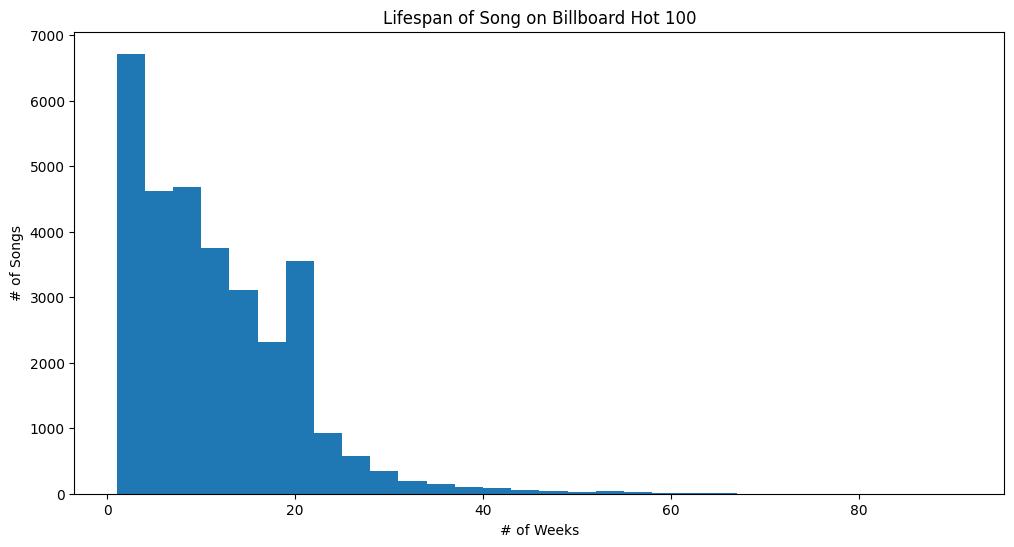

In [4]:
weeks_on_chart = pivot.notna().sum(axis=1)

# Add it as a new column in the pivot table
pivot["total_weeks_on_chart"] = weeks_on_chart

plt.figure(figsize=(12, 6))

# Show result
pivot["total_weeks_on_chart"].plot(kind="hist",
                                   bins=30)
plt.title("Lifespan of Song on Billboard Hot 100")
plt.xlabel("# of Weeks")
plt.ylabel("# of Songs")

In [5]:
print(weeks_on_chart.describe())

max_weeks = pivot.reset_index()
max_weeks = max_weeks[max_weeks["total_weeks_on_chart"] == weeks_on_chart.max()]

print(f"Longest Billboard Streak: {max_weeks["performer"]} @ {weeks_on_chart.max()} weeks ")

count    31344.000000
mean        10.961811
std          8.522820
min          1.000000
25%          4.000000
50%          9.000000
75%         16.000000
max         91.000000
dtype: float64
Longest Billboard Streak: 10077    Glass Animals
Name: performer, dtype: object @ 91 weeks 


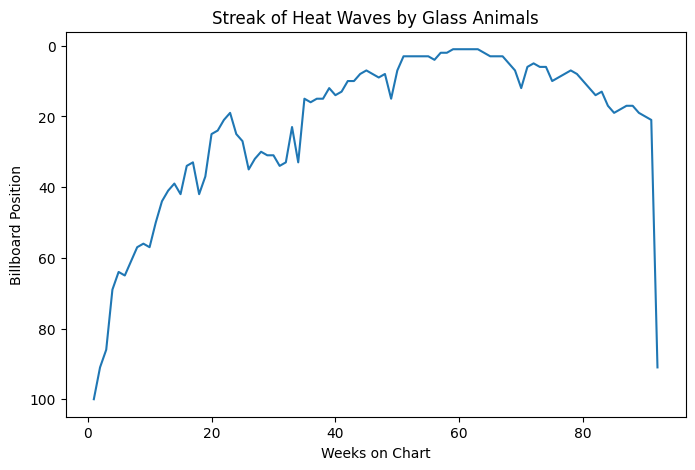

In [6]:
# Extract the row for that song
track = pivot.loc[("Heat Waves", "Glass Animals")].dropna()

# Re-number weeks from 1 to N
track.index = range(1, len(track)+1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(track)
plt.gca().invert_yaxis()  # rank 1 at the top
plt.title(f"Streak of Heat Waves by Glass Animals")
plt.xlabel("Weeks on Chart")
plt.ylabel("Billboard Position")
plt.show()


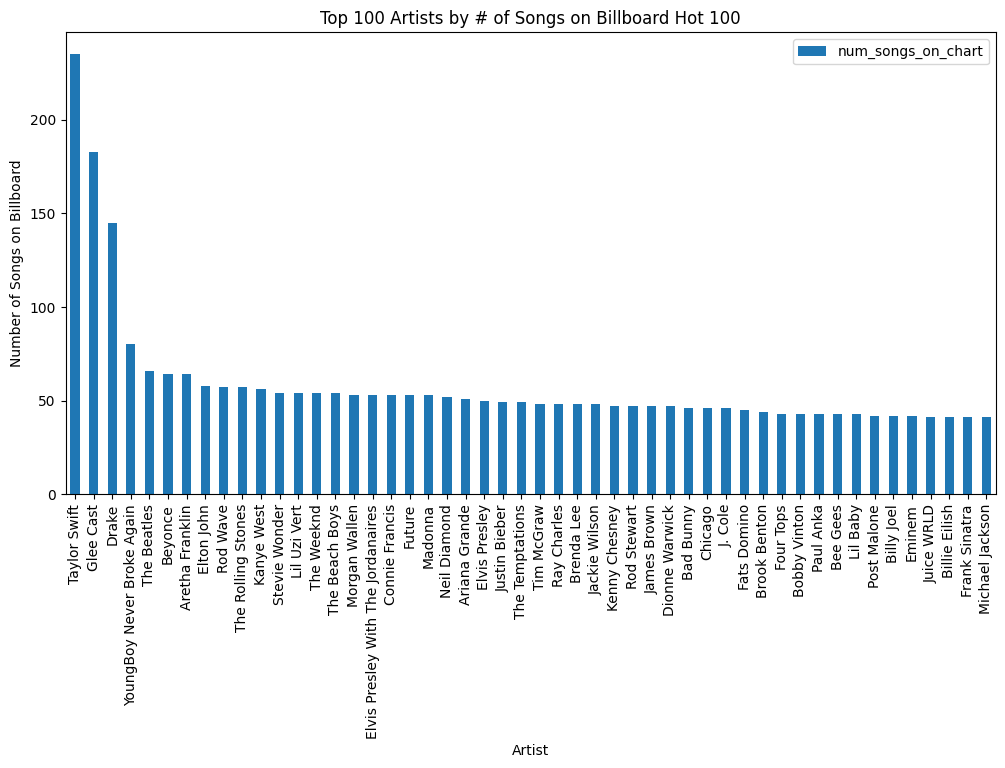

In [7]:
# Reset pivot index
pivot_reset = pivot.reset_index()

# Count distinct songs per performer
songs_per_performer = pivot_reset.groupby("performer")["title"].nunique()

# Convert Series to DataFrame and rename column
songs_per_performer = songs_per_performer.reset_index()
songs_per_performer = songs_per_performer.rename(columns={"title": "num_songs_on_chart"})

# Take top 100 performers
top100 = songs_per_performer.sort_values("num_songs_on_chart", ascending=False).head(50)

# Plot
top100.plot(x="performer", y="num_songs_on_chart", kind="bar", figsize=(12, 6))
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Number of Songs on Billboard")
plt.title("Top 100 Artists by # of Songs on Billboard Hot 100")
plt.show()

# Example: Tracking Bob Dylan's Chart Peformance By Song #

We chose Bob Dylan as an example because he had relavitely few hit singles when compared to a more sensational artist, which makes this specific visualization easier. The result shows a pattern of rises and falls, which falls in line with what we expected to observe for the performance of a song.

In [8]:
bob = pivot[
    pivot.index.get_level_values("performer").str.contains("bob dylan", case=False)
]
bob = bob.drop(columns="total_weeks_on_chart")

aligned = {}

for (title, performer), row in bob.iterrows():

    # Drop weeks where the song wasn't on the chart
    track = row.dropna().sort_index()
    
    # Re-number from 1 to N
    track.index = range(1, len(track) + 1)
    
    aligned[(title, performer)] = track

aligned_df = pd.DataFrame(aligned)

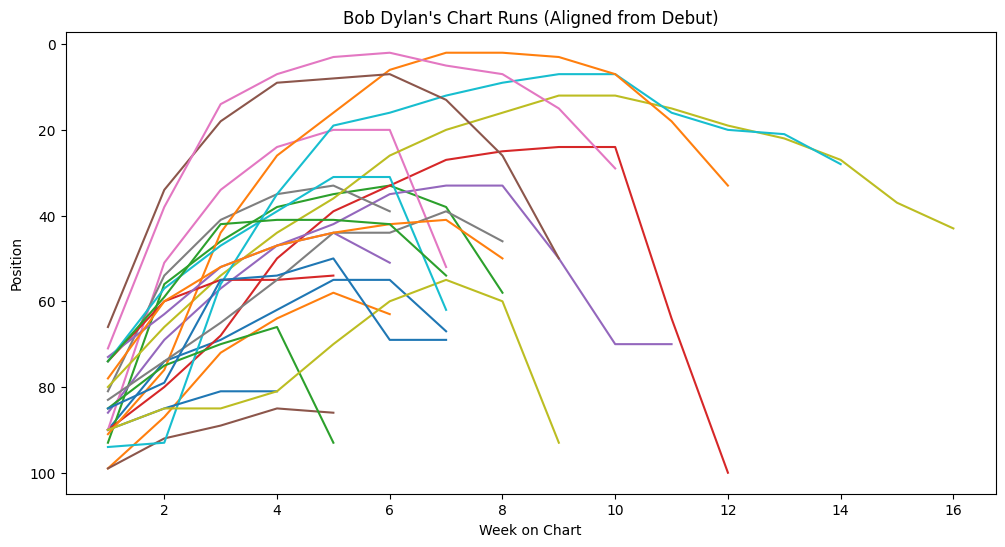

In [9]:
plt.figure(figsize=(12, 6))

for col in aligned_df:
    plt.plot(aligned_df.index, aligned_df[col], label=col[0])

plt.gca().invert_yaxis()
plt.title("Bob Dylan's Chart Runs (Aligned from Debut)")
plt.xlabel("Week on Chart")
plt.ylabel("Position")
plt.show()

In [10]:
# since spotify took down their api to get song information, we had to resort to using a csv of 1.2+ million spotify songs in which the track_features api
# we were planning on using was already run and had the results stored.

spotify_api_data = pd.read_csv("tracks_features.csv")
spotify_api_data = spotify_api_data.drop(columns=["id", "album_id", "artist_ids", "track_number", "disc_number", "year", "release_date", "mode", "instrumentalness"])
spotify_api_data.head()


name                      album  \
0                Testify  The Battle Of Los Angeles   
1        Guerrilla Radio  The Battle Of Los Angeles   
2       Calm Like a Bomb  The Battle Of Los Angeles   
3              Mic Check  The Battle Of Los Angeles   
4  Sleep Now In the Fire  The Battle Of Los Angeles   

                        artists  explicit  danceability  energy  key  \
0  ['Rage Against The Machine']     False         0.470   0.978    7   
1  ['Rage Against The Machine']      True         0.599   0.957   11   
2  ['Rage Against The Machine']     False         0.315   0.970    7   
3  ['Rage Against The Machine']      True         0.440   0.967   11   
4  ['Rage Against The Machine']     False         0.426   0.929    2   

   loudness  speechiness  acousticness  liveness  valence    tempo  \
0    -5.399       0.0727       0.02610    0.3560    0.503  117.906   
1    -5.764       0.1880       0.01290    0.1550    0.489  103.680   
2    -5.424       0.4830       0.02340    0.1220    0.370  149.749   
3    -5.830       0.2370       0.16300    0.1210    0.574   96.752   
4    -6.729       0.0701       0.00162    0.0789    0.539  127.059   

   duration_ms  time_signature  
0       210133             4.0  
1       206200             4.0  
2       298893             4.0  
3       213640             4.0  
4       205600             4.0

In [11]:
hot = data.copy()
tracks = spotify_api_data.copy()

# normalize strings for matching
hot_norm = hot.assign(title_norm=hot["title"].str.lower().str.strip(), performer_norm=hot["performer"].str.lower().str.strip())
tracks_norm = tracks.assign(
    title_norm=tracks["name"].str.lower().str.strip(),
    artists_norm=tracks["artists"].str.lower(),
)

# match on title, then require the performer to appear in the artists list
title_matches = hot_norm.merge(tracks_norm[["title_norm", "artists_norm"]], on="title_norm", how="inner")

mask = []
for i in range(len(title_matches)):
    performer = title_matches.loc[i, "performer_norm"]
    artists = title_matches.loc[i, "artists_norm"]
    mask.append(performer in artists)

row_matches = title_matches[mask]
matches = len(row_matches)
total_hot = len(hot)
percent = (matches / total_hot) * 100

print(f"Songs from hot-100-current found in tracks_features: {matches} out of {total_hot} ({percent:.1f}%).")

Songs from hot-100-current found in tracks_features: 173625 out of 343600 (50.5%).


In [12]:
#   after looking at the csv files, I noticed a common pattern of the billboard hot 100 artists being labeled with the terms
#   "featured" and a "&" when there were multiple artists. this was causing certain tracks to not register.

hot_clean = hot.assign(
    title_norm=hot["title"].str.lower().str.strip().str.split(r"\s+featuring\s+", regex=True).str[0].str.split(" & ").str[0], 
    performer_norm=hot["performer"].str.lower().str.strip().str.split(r"\s+featuring\s+", regex=True).str[0].str.split(" & ").str[0])

tracks_clean = tracks.assign(
    title_norm=tracks["name"].str.lower().str.strip().str.split(r"\s+featuring\s+", regex=True).str[0].str.split(" & ").str[0],
    artists_norm=tracks["artists"].str.lower())

# match on title, then require performer to appear in artists list
title_matches_clean = hot_clean.merge(tracks_clean[["title_norm", "artists_norm"]], on="title_norm", how="inner")

mask = []
for i in range(len(title_matches_clean)):
    performer = title_matches_clean.loc[i, "performer_norm"]
    artists = title_matches_clean.loc[i, "artists_norm"]
    mask.append(performer in artists)

row_matches_clean = title_matches_clean[mask]
matches_clean = len(row_matches_clean)
percent_clean = (matches_clean / len(hot)) * 100

print(f"After stripping 'featuring' and ' & ': {matches_clean} out of {len(hot)} ({percent_clean:.1f}%)")

After stripping 'featuring' and ' & ': 181583 out of 343600 (52.8%)


In [13]:
# merge again with full track fields, then filter to the same matched rows
title_matches_full = hot_clean.merge(
    tracks_clean[
        [
            "title_norm",
            "name",
            "album",
            "artists",
            "explicit",
            "danceability",
            "energy",
            "key",
            "loudness",
            "speechiness",
            "acousticness",
            "liveness",
            "valence",
            "tempo",
            "duration_ms",
            "time_signature",
            "artists_norm",
        ]
    ],
    on="title_norm",
    how="inner",
)

mask_full = []
for i in range(len(title_matches_full)):
    performer = title_matches_full.loc[i, "performer_norm"]
    artists = title_matches_full.loc[i, "artists_norm"]
    mask_full.append(performer in artists)

combined_df = title_matches_full[mask_full][
    [
        "name",
        "performer",
        "album",
        "current_week",
        "last_week",
        "wks_on_chart",
        "peak_pos",
        "chart_week",
        "explicit",
        "danceability",
        "energy",
        "key",
        "loudness",
        "speechiness",
        "acousticness",
        "liveness",
        "valence",
        "tempo",
        "duration_ms",
        "time_signature"
    ]
]

print(f"Combined matched rows: {len(combined_df)}")
combined_df = combined_df.reset_index(drop=True)
combined_df.sample(n=5)

Combined matched rows: 181583


name           performer  \
31998   Until You Come Back to Me (That's What I'm Gon...     Aretha Franklin   
31469                               What It Comes Down To  The Isley Brothers   
99165                                              Carrie              Europe   
125359                                   As I Lay Me Down   Sophie B. Hawkins   
154017                         Betcha Can't Do It Like Me                 D4L   

                               album  current_week  last_week  wks_on_chart  \
31998    The Best Of Aretha Franklin            27       19.0            18   
31469   The Essential Isley Brothers            68       71.0             6   
99165                      1982-1992             5        7.0            10   
125359                        Whaler            20       19.0            31   
154017                     2000s Pop            80       79.0             6   

        peak_pos chart_week  explicit  danceability  energy  key  loudness  \
31998          3 1974-03-23     False         0.680   0.540    2    -9.831   
31469         68 1974-02-02     False         0.579   0.688    0    -8.907   
99165          5 1987-10-03     False         0.427   0.516    7    -6.093   
125359         6 1995-12-30     False         0.519   0.737   10    -8.700   
154017        72 2006-03-25     False         0.904   0.344   10    -8.330   

        speechiness  acousticness  liveness  valence    tempo  duration_ms  \
31998        0.0275       0.62400    0.1160    0.718   94.548       206213   
31469        0.0503       0.54300    0.5120    0.793  117.540       233680   
99165        0.0282       0.18800    0.3420    0.131  136.203       269667   
125359       0.0437       0.64500    0.2710    0.668   82.999       248893   
154017       0.2860       0.00829    0.0795    0.226  148.950       220453   

        time_signature  
31998              4.0  
31469              4.0  
99165              4.0  
125359             4.0  
154017             4.0

In [14]:
# quickly changing explicit from True and False to 1 and 0 respectivley

combined_df["explicit"] = combined_df["explicit"].map({False: 0, True: 1})

# Futher Data Cleaning #

When looking through the combined DataFrame, we found that our results were odd and unreasonable. This was because many songs in the DataFrame were being repeated mulitple times, mostly for two reasons:

- **The Structure of the Billboard dataset:** The dataset we used, as discussed earlier, lists each week's billboard chart consectuively. For example, the A Tribe Called Quest song "Award Tour" appeared within the chart around 17 times. This meant that all of it's Spotify features were then accounted for 17 times, leading to a large bias towards songs with long lifespans on the charts.
- **Rereleases and other Anomalies:** Some songs reappear on the charts for cultural or commercial reasons. Continuing with "Award Tour", additional repeats occurred because of re-releases or compilation albums. Other examples include:

    - "All I Want for Christmas is You" by Mariah Carey: Reappears almost every Christmas season.
    - The songs of John Lennon, Michael Jackson, and other artists who have passed reappeared as the public mourns their loss.
    - "Master of Puppets" by Metallica reappeared in the Billboard charts because of it's importance in Season 4 of Stranger Things.

To combat this, we reorganized our dataset so that each song appears once. The weeks on chart was then altered to keep the longest run of a song, while all other features remained the same.

## 20 Week Anomaly ##

In addition, there is an odd anomaly in which there is a large cluster of songs with a lifespan of 20 weeks. This is due to a rule that Billboard enforced up until October 2025. Beginning in the early 90s, Billboard would remove any song that fell below position no. 50 after 20 weeks. As a result, many songs that may have stayed longer were capped at 20 weeks. Consequently, many songs that could have stayed longer were capped at 20 weeks. Although chart rules have since evolved, this creates an artificial spike in the dataset.

We decided to keep this as well as it's mostly a result of Billboard's management of the charts, and there is really no way we could "correct" these songs trajectories from the data itself.

In [15]:
cleaned = (
    combined_df.groupby(["name", "performer"])
    .agg({
        "wks_on_chart": "max",      
        "danceability": "first",
        "energy": "first",
        "loudness": "first",
        "speechiness": "first",
        "acousticness": "first",
        "liveness": "first",
        "valence": "first",
        "tempo": "first",
        "duration_ms": "first",
        "explicit": "first",
        "key": "first",
        "chart_week": "first"
    })
    .reset_index()
)

print(f"Total Number of Entries (Accounting for Duplicates): {cleaned.size}")

Total Number of Entries (Accounting for Duplicates): 89610


In [16]:
cleaned.head()

name      performer  \
0                                 '65 Love Affair     Paul Davis   
1                    'Til I Can Make It On My Own  Tammy Wynette   
2                (All Of A Sudden) My Heart Sings      Paul Anka   
3                       (Believed You Were) Lucky   'Til Tuesday   
4  (For God's Sake) Give More Power To The People  The Chi-lites   

   wks_on_chart  danceability  energy  loudness  speechiness  acousticness  \
0            20         0.617   0.691    -3.643       0.0268         0.351   
1             5         0.462   0.300   -11.937       0.0300         0.774   
2            17         0.307   0.267   -11.898       0.0327         0.809   
3             3         0.612   0.523   -11.425       0.0321         0.448   
4            11         0.751   0.527   -14.294       0.0574         0.202   

   liveness  valence    tempo  duration_ms  explicit  key chart_week  
0    0.0831    0.915  156.109       219827         0    2 1982-02-27  
1    0.1180    0.151  140.767       181800         0    7 1976-05-01  
2    0.2690    0.390  111.322       184200         0    4 1958-12-22  
3    0.0727    0.495  124.315       216973         0    5 1989-01-21  
4    0.0953    0.449   97.814       227427         0   11 1971-04-10

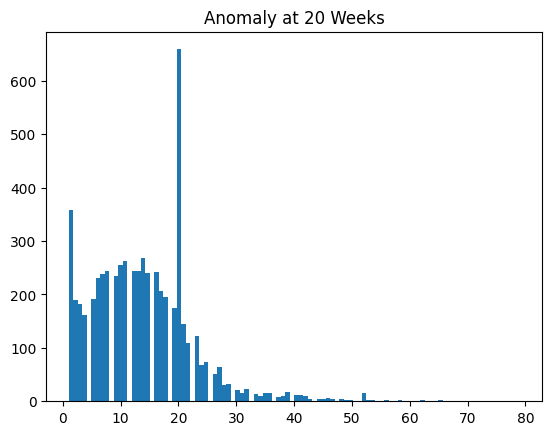

In [17]:
# visualizing the 20 week anomaly

plt.figure()
plt.title("Anomaly at 20 Weeks")
plt.hist(cleaned['wks_on_chart'], bins=100)
plt.show()

In [18]:
# turn explicit and key into true catergorical features for ease of use
cleaned["explicit_cat"] = cleaned["explicit"].map({0: "No", 1: "Yes"})

key_map = {
    0: "C",
    1: "C#",
    2: "D",
    3: "D#",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "G#",
    9: "A",
    10: "A#",
    11: "B"
}

cleaned["key_cat"] = cleaned["key"].map(key_map)

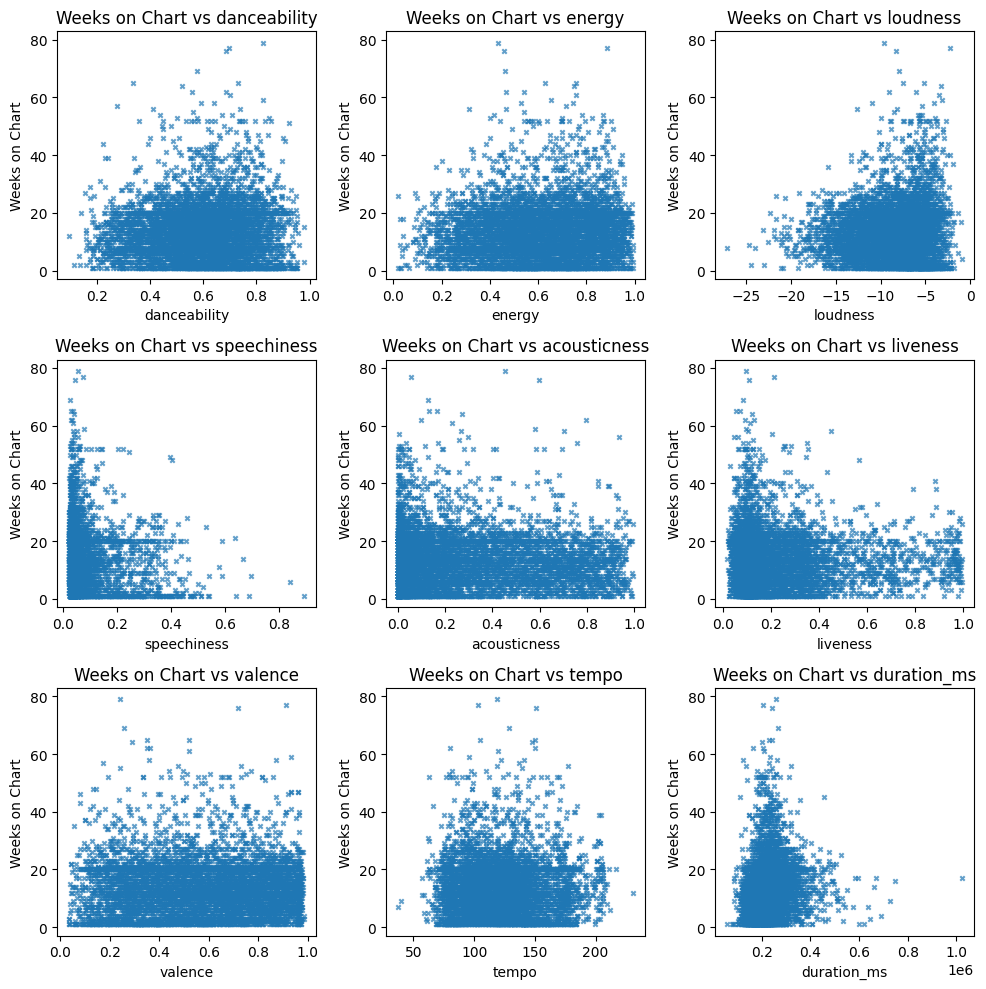

In [19]:
predictor_list = ["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms"]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

axes = axes.flatten()

for i, col in enumerate(predictor_list):
    data = cleaned[[col, "wks_on_chart"]].dropna()
    axes[i].scatter(data[col], data["wks_on_chart"], marker="x", alpha=0.7, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Weeks on Chart')
    axes[i].set_title(f'Weeks on Chart vs {col}')

plt.tight_layout()

# you can still actually see the 20 week anomaly in these scatter plots, as well as an additional, smaller one at 50 weeks

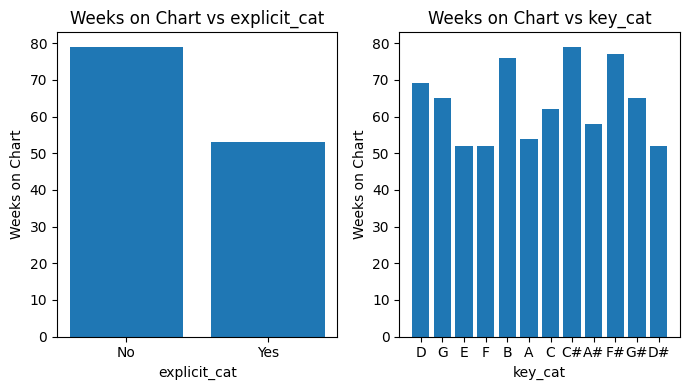

In [20]:
cat_predictor_list = ["explicit_cat", "key_cat"]

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

axes = axes.flatten()

for i, col in enumerate(cat_predictor_list):
    data = cleaned[[col, "wks_on_chart"]].dropna()
    axes[i].bar(data[col], data["wks_on_chart"])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Weeks on Chart')
    axes[i].set_title(f'Weeks on Chart vs {col}')

plt.tight_layout()

In [21]:
# creating a one-hot encoding for the key

key_raw = cleaned["key_cat"]
for pitch in sorted(key_raw.unique()):
    cleaned[f"key{pitch}"] = (key_raw == pitch).astype(int)

In [22]:
cleaned.head(3)

name      performer  wks_on_chart  \
0                   '65 Love Affair     Paul Davis            20   
1      'Til I Can Make It On My Own  Tammy Wynette             5   
2  (All Of A Sudden) My Heart Sings      Paul Anka            17   

   danceability  energy  loudness  speechiness  acousticness  liveness  \
0         0.617   0.691    -3.643       0.0268         0.351    0.0831   
1         0.462   0.300   -11.937       0.0300         0.774    0.1180   
2         0.307   0.267   -11.898       0.0327         0.809    0.2690   

   valence    tempo  duration_ms  explicit  key chart_week explicit_cat  \
0    0.915  156.109       219827         0    2 1982-02-27           No   
1    0.151  140.767       181800         0    7 1976-05-01           No   
2    0.390  111.322       184200         0    4 1958-12-22           No   

  key_cat  keyA  keyA#  keyB  keyC  keyC#  keyD  keyD#  keyE  keyF  keyF#  \
0       D     0      0     0     0      0     1      0     0     0      0   
1       G     0      0     0     0      0     0      0     0     0      0   
2       E     0      0     0     0      0     0      0     1     0      0   

   keyG  keyG#  
0     0      0  
1     1      0  
2     0      0

# Modeling: Random Forest Models

## Model 1

This is the general model. We will take into account all of the features.

In [23]:
X_1 = cleaned[["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms", "explicit", 
             "keyA", "keyA#", "keyB", "keyC", "keyC#", "keyD", "keyD#", "keyE", "keyF", "keyF#", "keyG", "keyG#"]]
y_1 = cleaned['wks_on_chart']

In [24]:
# split X and y into training and testing sets
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.20, random_state=1)

In [25]:
# instantiate model
model1 = RandomForestRegressor(random_state=1, max_depth=10, n_estimators=500)

# fit model
model1.fit(X_train_1, y_train_1)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=1)

In [26]:
# make estimations for the testing set
y_pred_1 = model1.predict(X_test_1)

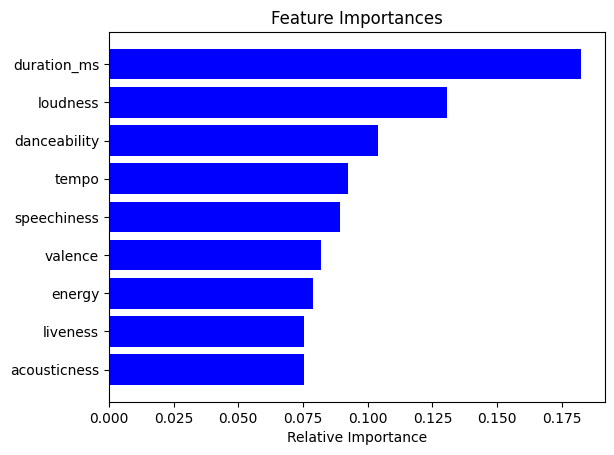

In [40]:
features = X_1.columns
importances = model1.feature_importances_
indices = np.argsort(importances)[-9:]  # top 20 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [28]:
mae_1  = metrics.mean_absolute_error(y_test_1, y_pred_1)
rmse_1 = metrics.root_mean_squared_error(y_test_1, y_pred_1)
r2_1   = metrics.r2_score(y_test_1, y_pred_1)

print("MAE :", mae_1)
print("RMSE:", rmse_1)
print("R^2 :", r2_1)


MAE : 6.814616151810412
RMSE: 9.200863313701268
R^2 : 0.07212053293742948


This model SUCKS!

## Model 2

We wonder if we are introducing too much noise with all the features. What if we took just the most important?

In [29]:
X_2 = cleaned[["danceability", "loudness", "speechiness", "tempo", "duration_ms"]]
y_2 = cleaned['wks_on_chart']

In [30]:
# split X and y into training and testing sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=1)

In [31]:
# instantiate model
model2 = RandomForestRegressor(random_state=1, max_depth=10, n_estimators=500)

# fit model
model2.fit(X_train_2, y_train_2)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=1)

In [32]:
# make estimations for the testing set
y_pred_2 = model2.predict(X_test_2)

In [33]:
mae_2  = metrics.mean_absolute_error(y_test_2, y_pred_2)
rmse_2 = metrics.root_mean_squared_error(y_test_2, y_pred_2)
r2_2   = metrics.r2_score(y_test_2, y_pred_2)

print("MAE :", mae_2)
print("RMSE:", rmse_2)
print("R^2 :", r2_2)


MAE : 6.881701775092872
RMSE: 9.241913776064658
R^2 : 0.06382243078782501


This model is EVEN WORSE! After more research we learned that random forrest models are not perticularly affected by less significant features. Meaning that rather than getting better, the models just had less information to make a decision so it got worse. 

## Model 3

We believe that the model might have a difficult time making predictions because its pulling from musical trends from the 1960s until now. What if we took just music from the last 25 years of our dataset?

In [34]:
# ensure chart_week is datetime
cleaned["chart_week"] = pd.to_datetime(cleaned["chart_week"])

# take only the songs within the last 5 years of our dataset
recent_cleaned = cleaned[cleaned["chart_week"] >= pd.Timestamp("2000-01-01")].copy()

In [35]:
X_3 = recent_cleaned[["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence", "tempo", "duration_ms", "explicit", 
             "keyA", "keyA#", "keyB", "keyC", "keyC#", "keyD", "keyD#", "keyE", "keyF", "keyF#", "keyG", "keyG#"]]
y_3 = recent_cleaned['wks_on_chart']

In [36]:
# split X and y into training and testing sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.20, random_state=1)

In [37]:
# instantiate model
model3 = RandomForestRegressor(random_state=1, max_depth=10, n_estimators=500)

# fit model
model3.fit(X_train_3, y_train_3)

RandomForestRegressor(max_depth=10, n_estimators=500, random_state=1)

In [38]:
# make estimations for the testing set
y_pred_3 = model3.predict(X_test_3)

In [39]:
mae_3  = metrics.mean_absolute_error(y_test_3, y_pred_3)
rmse_3 = metrics.root_mean_squared_error(y_test_3, y_pred_3)
r2_3   = metrics.r2_score(y_test_3, y_pred_3)

print("MAE :", mae_3)
print("RMSE:", rmse_3)
print("R^2 :", r2_3)

MAE : 8.713370374559998
RMSE: 11.668979787719204
R^2 : 0.05922301947716835
